In [1]:
# ================== IMPORT LIBRARIES ==================

# Data handling
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)

In [2]:
# ================== READ DATASET ==================

# File path (update path if needed)
file_path = r"C:\Users\NAC\Downloads\PROJECT\diabetes_prediction_dataset.csv"

# Load dataset
data = pd.read_csv(file_path)

# Shape of dataset
print("✅ Dataset loaded successfully")
print("Shape (rows, columns):", data.shape)

# First 5 rows
print(data.head())


✅ Dataset loaded successfully
Shape (rows, columns): (100000, 9)
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [3]:
# ================== PREPROCESSING ==================

# 1. Check for null values
print("\n🔎 Null values per column:")
print(data.isnull().sum())

# Fill null values with median (numeric only)
data = data.fillna(data.median(numeric_only=True))

# 2. Check for duplicates
print("\n🔎 Number of duplicate rows:", data.duplicated().sum())
data = data.drop_duplicates()

print("\n✅ After cleaning: Shape =", data.shape)

# 3. Dataset Info
print("\n🔎 Dataset Info:")
print(data.info())

# 4. Statistical Summary
print("\n🔎 Statistical Summary:")
print(data.describe())


🔎 Null values per column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

🔎 Number of duplicate rows: 3854

✅ After cleaning: Shape = (96146, 9)

🔎 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  i

C:\Users\NAC\AppData\Local\Temp\ipykernel_8148\1414108675.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="diabetes", data=data, palette="Set2")


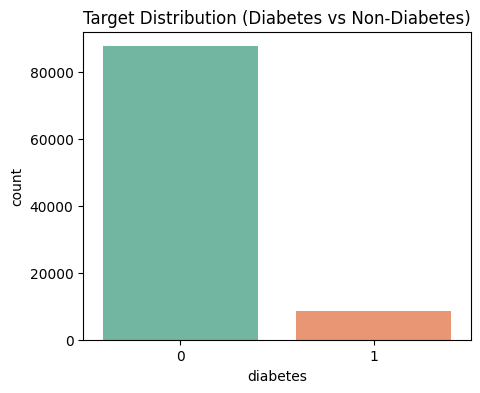

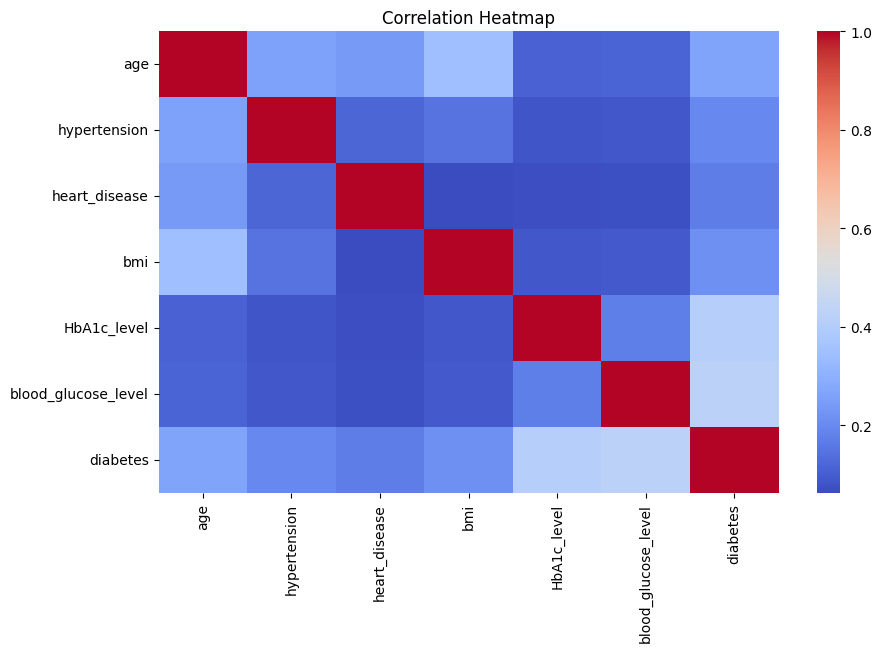


🔎 Target column distribution:
diabetes
0    87664
1     8482
Name: count, dtype: int64


C:\Users\NAC\AppData\Local\Temp\ipykernel_8148\1414108675.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="diabetes", data=data, palette="pastel")


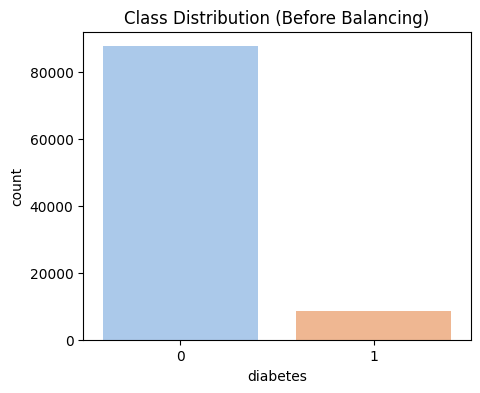

In [4]:

# ================== EXPLORATORY DATA ANALYSIS ==================

# Target column distribution
plt.figure(figsize=(5,4))
sns.countplot(x="diabetes", data=data, palette="Set2")
plt.title("Target Distribution (Diabetes vs Non-Diabetes)")
plt.show()

# Correlation heatmap
numeric_data = data.select_dtypes(include=np.number)
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
# Class distribution
print("\n🔎 Target column distribution:")
print(data["diabetes"].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x="diabetes", data=data, palette="pastel")
plt.title("Class Distribution (Before Balancing)")
plt.show()



🔎 Significance Test: Relationship between BMI and Diabetes
T-statistic: 60.32627527760363
P-value: 0.0
✅ Significant: BMI is strongly associated with diabetes


C:\Users\NAC\AppData\Local\Temp\ipykernel_8148\4019268108.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diabetes", y="bmi", data=data, palette="Set2")


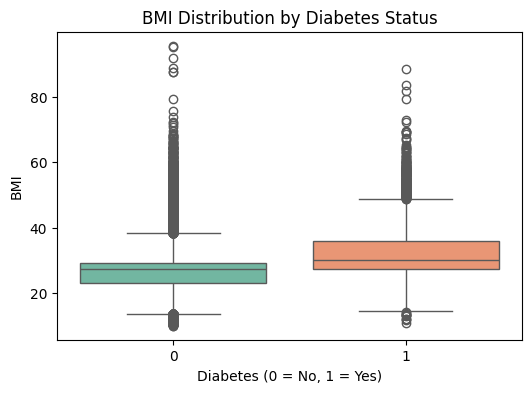

In [9]:
# ================== SIGNIFICANCE TEST ==================

from scipy.stats import ttest_ind

print("\n🔎 Significance Test: Relationship between BMI and Diabetes")

# Split BMI values into diabetic vs non-diabetic groups
bmi_diabetic = data[data["diabetes"] == 1]["bmi"]
bmi_non_diabetic = data[data["diabetes"] == 0]["bmi"]

# Perform independent t-test
t_stat, p_value = ttest_ind(bmi_diabetic, bmi_non_diabetic, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("✅ Significant: BMI is strongly associated with diabetes")
else:
    print("❌ Not Significant: BMI has no strong relationship with diabetes")

# Boxplot for visualization
plt.figure(figsize=(6,4))
sns.boxplot(x="diabetes", y="bmi", data=data, palette="Set2")
plt.title("BMI Distribution by Diabetes Status")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("BMI")
plt.show()



Before SMOTE:
diabetes
0    70130
1     6786
Name: count, dtype: int64

After SMOTE:
diabetes
0    70130
1    70130
Name: count, dtype: int64


C:\Users\NAC\AppData\Local\Temp\ipykernel_8148\2238459849.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_res, palette="Set2")


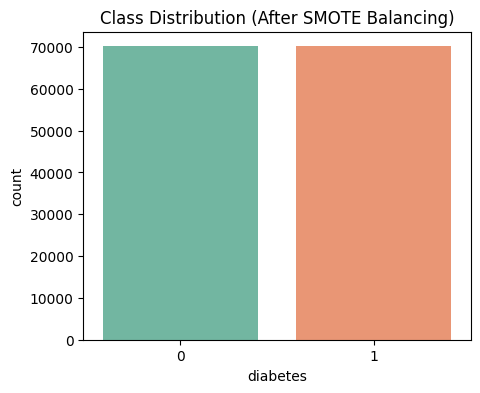

In [5]:

# ================== HANDLE IMBALANCE WITH SMOTE ==================

# Separate features (X) and target (y)
X = data.drop("diabetes", axis=1)
y = data["diabetes"]

# One-Hot Encode categorical columns (e.g., 'gender')
X = pd.get_dummies(X, drop_first=True)

# Split into training & testing (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nBefore SMOTE:")
print(y_train.value_counts())
# Apply SMOTE on training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print(y_train_res.value_counts())

# Plot balanced class distribution
plt.figure(figsize=(5,4))
sns.countplot(x=y_train_res, palette="Set2")
plt.title("Class Distribution (After SMOTE Balancing)")
plt.show()



In [6]:

# ================== MODEL TRAINING ==================

# Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_res, y_train_res)

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # tune max_depth as needed
tree_model.fit(X_train_res, y_train_res)

print("✅ Models trained: Logistic Regression & Decision Tree")


✅ Models trained: Logistic Regression & Decision Tree


In [7]:

# ================== EVALUATION FUNCTION ==================

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    """Evaluate a model on both train and test sets"""
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred)
    train_rec = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)

    # Testing metrics
    test_acc = accuracy_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred)
    test_rec = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
      # Print results
    print(f"\n📊 {name} Performance:")
    print("Training -> Accuracy: %.3f | Precision: %.3f | Recall: %.3f | F1: %.3f" %
          (train_acc, train_prec, train_rec, train_f1))
    print("Testing  -> Accuracy: %.3f | Precision: %.3f | Recall: %.3f | F1: %.3f" %
          (test_acc, test_prec, test_rec, test_f1))

    # Confusion Matrix (Test)
    cm_test = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name} (Test Set)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    return {
        "Model": name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Train F1": train_f1,
        "Test F1": test_f1
    }


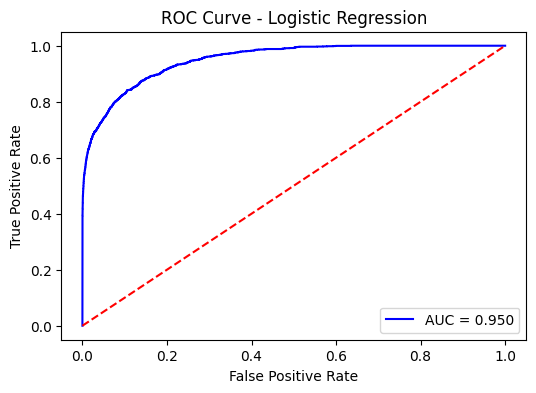

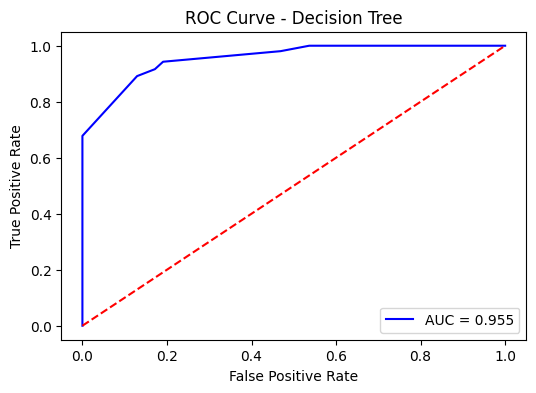

ROC-AUC (Logistic Regression): 0.9497886585846151
ROC-AUC (Decision Tree): 0.9554391864808212


In [10]:
# ================== ROC Curve and AUC ==================
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test, model_name):
    # Get predicted probabilities
    y_probs = model.predict_proba(X_test)[:,1]
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.3f}")
    plt.plot([0,1],[0,1], color="red", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.show()
    
    return roc_auc

# Plot ROC for both models
auc_log = plot_roc_curve(log_model, X_test, y_test, "Logistic Regression")
auc_tree = plot_roc_curve(tree_model, X_test, y_test, "Decision Tree")

print("ROC-AUC (Logistic Regression):", auc_log)
print("ROC-AUC (Decision Tree):", auc_tree)


                        Feature  Importance
4                   HbA1c_level    0.551416
5           blood_glucose_level    0.333198
0                           age    0.102729
3                           bmi    0.012657
2                 heart_disease    0.000000
1                  hypertension    0.000000
6                   gender_Male    0.000000
7                  gender_Other    0.000000
8       smoking_history_current    0.000000
9          smoking_history_ever    0.000000
10       smoking_history_former    0.000000
11        smoking_history_never    0.000000
12  smoking_history_not current    0.000000


C:\Users\NAC\AppData\Local\Temp\ipykernel_8148\4294542663.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importances.head(10), palette="viridis")


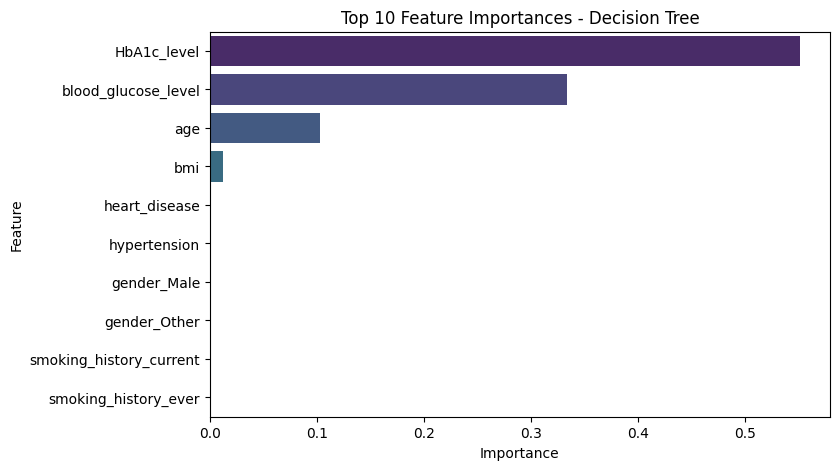

In [11]:
# ================== Feature Importance (Decision Tree) ==================
import pandas as pd
import numpy as np

# Get feature importances
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": tree_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importances)

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feature_importances.head(10), palette="viridis")
plt.title("Top 10 Feature Importances - Decision Tree")
plt.show()



📊 Logistic Regression Performance:
Training -> Accuracy: 0.914 | Precision: 0.914 | Recall: 0.915 | F1: 0.914
Testing  -> Accuracy: 0.902 | Precision: 0.468 | Recall: 0.817 | F1: 0.595


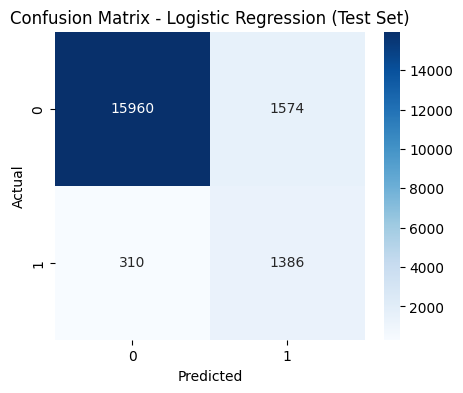


📊 Decision Tree Performance:
Training -> Accuracy: 0.902 | Precision: 0.881 | Recall: 0.930 | F1: 0.905
Testing  -> Accuracy: 0.872 | Precision: 0.400 | Recall: 0.892 | F1: 0.552


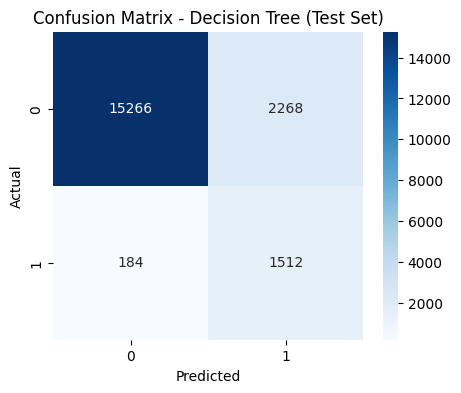


📊 Model Comparison Table:
                 Model  Train Accuracy  Test Accuracy  Train F1   Test F1
0  Logistic Regression        0.914388       0.902028  0.914464  0.595361
1        Decision Tree        0.902331       0.872491  0.904933  0.552228


In [8]:
# ================== RUN EVALUATION ==================

results = []
results.append(evaluate_model("Logistic Regression", log_model, X_train_res, y_train_res, X_test, y_test))
results.append(evaluate_model("Decision Tree", tree_model, X_train_res, y_train_res, X_test, y_test))


# ================== COMPARISON TABLE ==================

results_df = pd.DataFrame(results)
print("\n📊 Model Comparison Table:")
print(results_df)